# Capturing Non-Linearity with Kernels

## Introduction

This exercise aims to help you understand how kernel functions can be used to increase the experssivity of the model family by allowing the model to look for non-linear solutions while using a linear family. 

### Authors
- James Chapman
- Sahan Bulathwela
- John Shawe-Taylor

## Expressivity vs generalisation

When the solution space we search has access to relatively complex solutions (e.g. in contrast to linear solutions), we are increasing the expressivity of models. This in tern reduces the generalisation capabilities of the model and can risk overfitting. 

### Loading Data

We use a synthesised dataset for today's exercise. We start by taking the simpler dataset where the features have a linear relationship with the target veriable. 

In [1]:
#DO NOT CHANGE THIS CODE
import numpy as np
import matplotlib.pyplot as plt
X_train=np.loadtxt('./data/X_train_linear.txt')
X_test=np.loadtxt('./data/X_test_linear.txt')
y_train=np.loadtxt('./data/y_train_linear.txt')
y_test=np.loadtxt('./data/y_test_linear.txt')

### 1) Linear Regression
#### a) estimate w and b using linear regression based on the training data (X_train, y_train)

In [2]:
y = y_train.reshape(-1, 1)
X_aug = np.hstack([X_train, np.ones((X_train.shape[0], 1))])

#θ = (XᵀX)⁻¹ Xᵀy
theta = np.linalg.pinv(X_aug.T @ X_aug) @ X_aug.T @ y

w = theta[:-1]
b = theta[-1]

print("w (weights):", w.ravel())
print("b (bias):", float(b))

w (weights): [-0.02509466  0.06233634  0.21872749  0.23923045 -0.15106426  0.16663859
  0.01551069  0.01948491  0.0600464   0.07114099  0.15451654  0.13726405
 -0.03233869  0.00167551  0.0413212   0.16406781 -0.12222604  0.06800438
 -0.13240086 -0.26050699]
b (bias): -0.038270255886051124


C:\Users\10375\AppData\Local\Temp\ipykernel_20700\3391179869.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("b (bias):", float(b))


#### b) calculate the mean squared error for the training data and test data

In [3]:
y_train_pred = X_train @ w + b
y_test_pred  = X_test  @ w + b

# MSE = mean((y_true - y_pred)^2)
mse_train = np.mean((y_train - y_train_pred.flatten())**2)
mse_test  = np.mean((y_test  - y_test_pred.flatten())**2)

print("Training MSE:", mse_train)
print("Test MSE:", mse_test)

Training MSE: 0.6192069491444596
Test MSE: 0.7134675543943784


### 2) Exploring the effects of dimensionality
#### a) Using different sized subsets of the training data, repeat (1) and illustrate the trends of training error and test error as the sample size is increased

*** Hint:*** You may use a visualisation to explore this relationship.


C:\Users\10375\AppData\Local\Temp\ipykernel_20700\4132175233.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return theta[:-1], float(theta[-1])


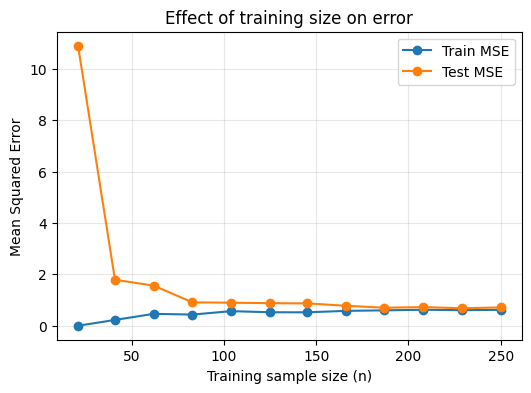

In [4]:
rng = np.random.default_rng(0)

def fit_linreg_return_wb(X, y):
    y = y.reshape(-1, 1)
    X_aug = np.hstack([X, np.ones((X.shape[0], 1))])
    theta = np.linalg.pinv(X_aug.T @ X_aug) @ X_aug.T @ y
    return theta[:-1], float(theta[-1])

def mse(y_true, y_pred):
    return float(np.mean((y_true - y_pred)**2))

sizes = np.unique(np.linspace(max(5, X_train.shape[1]+1), X_train.shape[0], 12, dtype=int))

train_mse, test_mse = [], []
for n in sizes:
    idx = rng.choice(X_train.shape[0], size=n, replace=False)
    X_sub, y_sub = X_train[idx], y_train[idx] 
    w, b = fit_linreg_return_wb(X_sub, y_sub)
    y_sub_pred  = X_sub @ w + b
    y_test_pred = X_test @ w + b
    
    train_mse.append(mse(y_sub, y_sub_pred.ravel()))
    test_mse.append(mse(y_test, y_test_pred.ravel()))

plt.figure(figsize=(6,4))
plt.plot(sizes, train_mse, marker='o', label='Train MSE')
plt.plot(sizes, test_mse, marker='o', label='Test MSE')
plt.xlabel('Training sample size (n)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of training size on error')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3) Regularisation (Ridge Regression)

In this section, we penalise the model for choosing high complexity using L2-Regularisation, aiming to *improve generalisability*.

#### a) Using a suitable plot, demonstrate the effect of ridge regeularisation on the train and test error

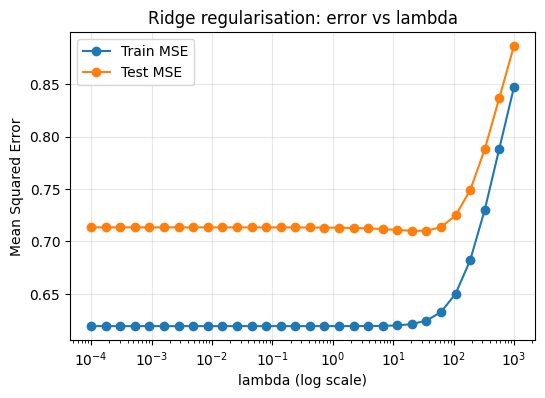

In [5]:
# Ridge: min ||y - (Xw + b)||^2 + λ||w||^2
y_tr = y_train.reshape(-1, 1)
y_te = y_test.reshape(-1, 1)

Xtr_aug = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
Xte_aug = np.hstack([X_test,  np.ones((X_test.shape[0], 1))])

p_aug = Xtr_aug.shape[1]
p = p_aug - 1 

def ridge_fit(X_aug, y, lam):
    R = np.zeros((p_aug, p_aug))
    np.fill_diagonal(R, 0.0)
    np.fill_diagonal(R[:p, :p], lam)
    #theta = (X^T X + R)^(-1) X^T y
    theta = np.linalg.solve(X_aug.T @ X_aug + R, X_aug.T @ y)
    w = theta[:p]
    b = theta[p:p+1]
    return w, b

def mse(y, yhat):
    return float(np.mean((y - yhat)**2))

lams = np.logspace(-4, 3, 30)
mse_tr_list, mse_te_list = [], []

for lam in lams:
    w, b = ridge_fit(Xtr_aug, y_tr, lam)
    yhat_tr = Xtr_aug @ np.vstack([w, b])
    yhat_te = Xte_aug @ np.vstack([w, b])
    mse_tr_list.append(mse(y_tr, yhat_tr))
    mse_te_list.append(mse(y_te, yhat_te))

plt.figure(figsize=(6,4))
plt.semilogx(lams, mse_tr_list, marker='o', label='Train MSE')
plt.semilogx(lams, mse_te_list, marker='o', label='Test MSE')
plt.xlabel('lambda (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge regularisation: error vs lambda')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### b) Using a suitable metric or plot, demonstrate the effect of ridge regularisation on the estimated weights

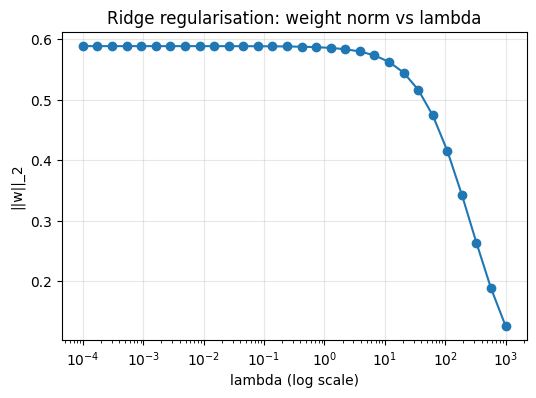

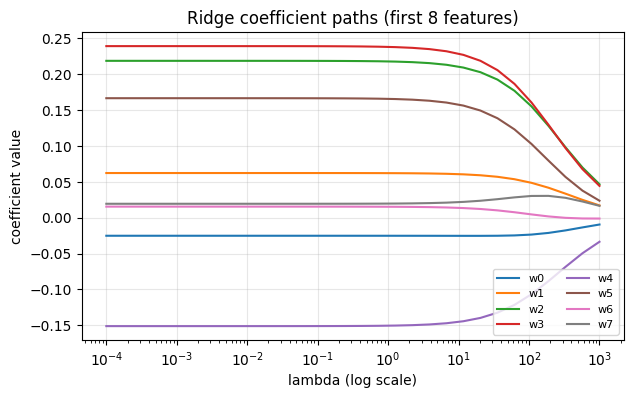

In [6]:
w_norms = []
thetas = []

for lam in lams:
    w, b = ridge_fit(Xtr_aug, y_tr, lam)
    w_norms.append(float(np.linalg.norm(w)))
    thetas.append(w.ravel()) 

plt.figure(figsize=(6,4))
plt.semilogx(lams, w_norms, marker='o')
plt.xlabel('lambda (log scale)')
plt.ylabel('||w||_2')
plt.title('Ridge regularisation: weight norm vs lambda')
plt.grid(True, alpha=0.3)
plt.show()

W = np.array(thetas) 
k = min(8, W.shape[1])

plt.figure(figsize=(7,4))
for j in range(k):
    plt.semilogx(lams, W[:, j], label=f'w{j}')
plt.xlabel('lambda (log scale)')
plt.ylabel('coefficient value')
plt.title('Ridge coefficient paths (first {} features)'.format(k))
plt.legend(ncol=2, fontsize=8)
plt.grid(True, alpha=0.3)
plt.show()

## 4) Kernel Regression

In this section, we aim to use kernelisation, which allows the solution to provide a solution that can go beyond linear modelling. This modification, *increases expressivity* of the downstream model.

### a) Demonstrate the equivalence of Ridge and Kernel Ridge Regression when using a linear kernel

First, we use a "linear" kernel, where we solve the regression problem using the dual form, but the solution is equivalent to the primal form linear regression. 

In [7]:
Xmu = X_train.mean(axis=0, keepdims=True)
ymu = y_train.mean(keepdims=True)

Xc_tr = X_train - Xmu
Xc_te = X_test  - Xmu
yc_tr = (y_train - ymu).reshape(-1, 1)

lam = 1e-4  

A = Xc_tr.T @ Xc_tr + lam * np.eye(Xc_tr.shape[1])
w = np.linalg.solve(A, Xc_tr.T @ yc_tr)           # (p,1)
yhat_pr_te = (Xc_te @ w).ravel() + ymu            
yhat_pr_tr = (Xc_tr @ w).ravel() + ymu

K_tr = Xc_tr @ Xc_tr.T                            # (n,n)
alpha = np.linalg.solve(K_tr + lam*np.eye(K_tr.shape[0]), yc_tr)  # (n,1)
K_te = Xc_te @ Xc_tr.T
yhat_du_te = (K_te @ alpha).ravel() + ymu
yhat_du_tr = (K_tr @ alpha).ravel() + ymu

mse = lambda y, yhat: float(np.mean((y - yhat)**2))
print("Primal  Test MSE:", mse(y_test, yhat_pr_te))
print("Dual(KRR) Test MSE:", mse(y_test, yhat_du_te))
print("Max |diff| on test:", float(np.max(np.abs(yhat_pr_te - yhat_du_te))))

Primal  Test MSE: 0.713467525546168
Dual(KRR) Test MSE: 0.7134675255225836
Max |diff| on test: 6.686889930662687e-10


### b) Construct the feature space represented by a polynomial kernel with degree 2 and demonstrate that for small values of ridge regularisation, the predictions of ridge regression with the explicit feature space and kernel ridge regression with the kernel representation are the same (or similar)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.pairwise import polynomial_kernel

lam = 1e-6  # 小正则

poly = PolynomialFeatures(degree=2, include_bias=True)  # 等价于 (x·z + 1)^2
Phi_tr = poly.fit_transform(X_train)   # (n, D)
Phi_te = poly.transform(X_test)

D = Phi_tr.shape[1]
R = np.zeros((D, D))
np.fill_diagonal(R[1:, 1:], lam)  
theta = np.linalg.solve(Phi_tr.T @ Phi_tr + R, Phi_tr.T @ y_train.reshape(-1,1))  # (D,1)
yhat_phi_te = (Phi_te @ theta).ravel()
yhat_phi_tr = (Phi_tr @ theta).ravel()

# ----- Kernel Ridge：K(x,z) = (x·z + 1)^2 -----
K_tr = polynomial_kernel(X_train, X_train, degree=2, gamma=1.0, coef0=1.0)
alpha = np.linalg.solve(K_tr + lam*np.eye(K_tr.shape[0]), y_train.reshape(-1,1))
K_te = polynomial_kernel(X_test, X_train, degree=2, gamma=1.0, coef0=1.0)
yhat_krr_te = (K_te @ alpha).ravel()
yhat_krr_tr = (K_tr @ alpha).ravel()

mse = lambda y, yhat: float(np.mean((y - yhat)**2))
print("Explicit Phi  Test MSE:", mse(y_test, yhat_phi_te))
print("Kernel Ridge  Test MSE:", mse(y_test, yhat_krr_te))
print("Max |diff| on test:", float(np.max(np.abs(yhat_phi_te - yhat_krr_te))))

Explicit Phi  Test MSE: 8.914200878295683
Kernel Ridge  Test MSE: 8.914205151787403
Max |diff| on test: 4.656879474929099e-06


### c) Using the following data plot the train and test error for kernel ridge regression with polynomial kernel of different degrees

In [ ]:
#DO NOT CHANGE THIS CODE
X_train=np.loadtxt('./data/X_train_poly.txt')
X_test=np.loadtxt('./data/X_test_poly.txt')
y_train=np.loadtxt('./data/y_train_poly.txt')
y_test=np.loadtxt('./data/y_test_poly.txt')

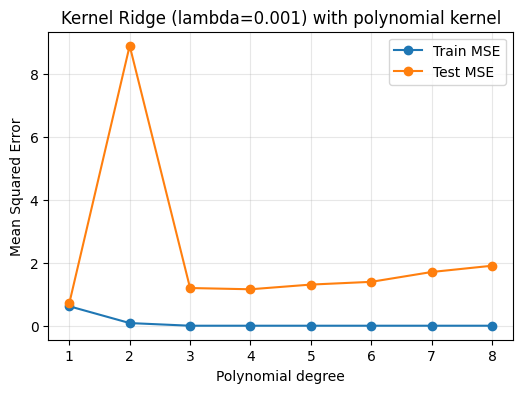

In [10]:
from sklearn.metrics.pairwise import polynomial_kernel

y_tr = y_train.reshape(-1, 1)
y_te = y_test.reshape(-1, 1)

def krr_predict_poly(Xtr, ytr, Xte, degree, lam=1e-3, gamma=1.0, coef0=1.0):
    # KRR dual solution with polynomial kernel
    K_tr = polynomial_kernel(Xtr, Xtr, degree=degree, gamma=gamma, coef0=coef0)
    alpha = np.linalg.solve(K_tr + lam * np.eye(K_tr.shape[0]), ytr)
    K_te = polynomial_kernel(Xte, Xtr, degree=degree, gamma=gamma, coef0=coef0)
    yhat_tr = K_tr @ alpha
    yhat_te = K_te @ alpha
    return yhat_tr.ravel(), yhat_te.ravel()

mse = lambda y, yhat: float(np.mean((y - yhat)**2))

degrees = range(1, 9)  # 阶数
lam = 1e-3             # 小ridge正则

train_mse, test_mse = [], []
for d in degrees:
    yhat_tr, yhat_te = krr_predict_poly(X_train, y_tr, X_test, degree=d, lam=lam)
    train_mse.append(mse(y_train, yhat_tr))
    test_mse.append(mse(y_test,  yhat_te))

plt.figure(figsize=(6,4))
plt.plot(degrees, train_mse, marker='o', label='Train MSE')
plt.plot(degrees, test_mse,  marker='o', label='Test MSE')
plt.xlabel('Polynomial degree')
plt.ylabel('Mean Squared Error')
plt.title(f'Kernel Ridge (lambda={lam}) with polynomial kernel')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### d) Repeat 3a) for a polynomial kernel with degree of your choice

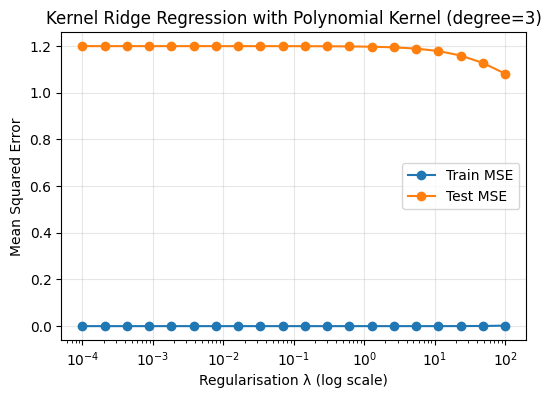

In [11]:
from sklearn.metrics.pairwise import polynomial_kernel

degree = 3       
lambdas = np.logspace(-4, 2, 20)  # λ从10^-4到10^2
gamma, coef0 = 1.0, 1.0

y_tr = y_train.reshape(-1, 1)
y_te = y_test.reshape(-1, 1)

def kernel_ridge(Xtr, ytr, Xte, lam, degree):
    # Kernel Ridge Regression with polynomial kernel
    K_tr = polynomial_kernel(Xtr, Xtr, degree=degree, gamma=gamma, coef0=coef0)
    alpha = np.linalg.solve(K_tr + lam * np.eye(K_tr.shape[0]), ytr)
    K_te = polynomial_kernel(Xte, Xtr, degree=degree, gamma=gamma, coef0=coef0)
    yhat_tr = K_tr @ alpha
    yhat_te = K_te @ alpha
    return yhat_tr.ravel(), yhat_te.ravel()

mse = lambda y, yhat: float(np.mean((y - yhat)**2))

train_mse, test_mse = [], []
for lam in lambdas:
    yhat_tr, yhat_te = kernel_ridge(X_train, y_tr, X_test, lam, degree)
    train_mse.append(mse(y_train, yhat_tr))
    test_mse.append(mse(y_test, yhat_te))

plt.figure(figsize=(6,4))
plt.semilogx(lambdas, train_mse, marker='o', label='Train MSE')
plt.semilogx(lambdas, test_mse,  marker='o', label='Test MSE')
plt.xlabel('Regularisation λ (log scale)')
plt.ylabel('Mean Squared Error')
plt.title(f'Kernel Ridge Regression with Polynomial Kernel (degree={degree})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### e) Using the following data demonstrate compare the performance of kernel ridge regression with rbf kernel and polynomial kernel

In [ ]:
#DO NOT CHANGE THIS CODE
X_train=np.loadtxt('./data/X_train_poly.txt')
X_test=np.loadtxt('./data/X_test_poly.txt')
y_train=np.loadtxt('./data/y_train_poly.txt')
y_test=np.loadtxt('./data/y_test_poly.txt')

[RBF] best λ=0.1, γ=0.001 | Train MSE=0.6201 | Test MSE=0.7122
[Poly] best λ=17.78, degree=1 | Train MSE=0.6207 | Test MSE=0.7099


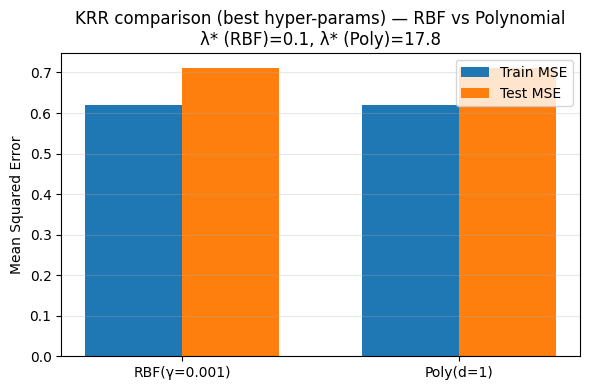

In [12]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel

mse = lambda y, yhat: float(np.mean((y - yhat)**2))

y_tr = y_train.reshape(-1, 1)
y_te = y_test.reshape(-1, 1)

def krr_dual(K_tr, ytr, K_te, lam):
    # α = (K + λI)^(-1) y,   yhat = K_* α
    alpha = np.linalg.solve(K_tr + lam * np.eye(K_tr.shape[0]), ytr)
    yhat_tr = K_tr @ alpha
    yhat_te = K_te @ alpha
    return yhat_tr.ravel(), yhat_te.ravel()

lams   = np.logspace(-4, 2, 9)        # λ grid
gammas = np.logspace(-3, 1, 9)        # for RBF: exp(-γ||x-z||^2)
degrees = range(1, 7)                 # for Polynomial: (x·z + 1)^d
coef0 = 1.0

rbf_results = []   # (lam, gamma, train_mse, test_mse)
for lam in lams:
    for g in gammas:
        Ktr = rbf_kernel(X_train, X_train, gamma=g)
        Kte = rbf_kernel(X_test,  X_train, gamma=g)
        yhat_tr, yhat_te = krr_dual(Ktr, y_tr, Kte, lam)
        rbf_results.append((
            lam, g,
            mse(y_train, yhat_tr),
            mse(y_test,  yhat_te),
        ))

lam_rbf, gamma_rbf, tr_rbf, te_rbf = min(rbf_results, key=lambda t: t[3])
print(f"[RBF] best λ={lam_rbf:.4g}, γ={gamma_rbf:.4g} | Train MSE={tr_rbf:.4f} | Test MSE={te_rbf:.4f}")

poly_results = []  # (lam, degree, train_mse, test_mse)
for lam in lams:
    for d in degrees:
        Ktr = polynomial_kernel(X_train, X_train, degree=d, gamma=1.0, coef0=coef0)
        Kte = polynomial_kernel(X_test,  X_train, degree=d, gamma=1.0, coef0=coef0)
        yhat_tr, yhat_te = krr_dual(Ktr, y_tr, Kte, lam)
        poly_results.append((
            lam, d,
            mse(y_train, yhat_tr),
            mse(y_test,  yhat_te),
        ))

lam_poly, deg_poly, tr_poly, te_poly = min(poly_results, key=lambda t: t[3])
print(f"[Poly] best λ={lam_poly:.4g}, degree={deg_poly} | Train MSE={tr_poly:.4f} | Test MSE={te_poly:.4f}")

labels = [f"RBF(γ={gamma_rbf:.3g})", f"Poly(d={deg_poly})"]
train_bars = [tr_rbf, tr_poly]
test_bars  = [te_rbf, te_poly]

x = np.arange(len(labels))
w = 0.35
plt.figure(figsize=(6,4))
plt.bar(x - w/2, train_bars, width=w, label="Train MSE")
plt.bar(x + w/2, test_bars,  width=w, label="Test MSE")
plt.xticks(x, labels, rotation=0)
plt.ylabel("Mean Squared Error")
plt.title(f"KRR comparison (best hyper-params) — RBF vs Polynomial\nλ* (RBF)={lam_rbf:.3g}, λ* (Poly)={lam_poly:.3g}")
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()